# ISLR Chapter 10 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i$th and $j$th observations, then the quantity $1 - r_{ij}$ is proportional to the squared Euclidean distance between the $i$th and $j$th observations.

### On the `USArrests` data, show that this proportionality holds.

Hint: The Euclidean distance can be calculated using the `dist()` function, and correlations can be calculated using the `cor()` function.

In [1]:
# transpose to scale by observation instead of variable
scaled = scale(t(USArrests))
# transpose again to get distances
sq.distances = as.matrix(dist(t(scaled)))**2
# computes correlation using the transposed scaled (cor by observation)
dcor = cor(scaled)
# compares only lower triangle of matrices to avoid division by 0
op.dcor = 1 - dcor[lower.tri(dcor)]
ratio = op.dcor/sq.distances[lower.tri(sq.distances)]
summary(ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.1667  0.1667  0.1667  0.1667  0.1667 

### 8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the `sdev` output of the `prcomp()` function.

### On the `USArrests` data, calculate PVE in two ways:

#### (a) Using the sdev output of the `prcomp()` function, as was done in Section 10.2.3.

#### (b) By applying Equation 10.8 directly. That is, use the `prcomp()` function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

These two approaches should give the same results.

Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed `prcomp()` using centered and scaled variables, then you must center and scale the variables before applying Equation 10.3 in (b).

In [2]:
pca = prcomp(USArrests, scale=T)
pca$sdev**2/sum(pca$sdev**2)

[1] 0.62006039 0.24744129 0.08914080 0.04335752

Equation 10.8:
$$
\frac{\sum_{i=1}^n\left(\sum_{j=1}^p\phi_{jm}x_{ij}\right)^2}{\sum_{j=1}^p\sum_{i=1}^nx^2_{ij}}
$$

In [3]:
apply((scale(USArrests)%*%pca$rotatio)**2,2,sum)/sum(scale(USArrests)**2)

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

### 9. Consider the `USArrests` data. We will now perform hierarchical clustering on the states.

#### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

#### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

#### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

#### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

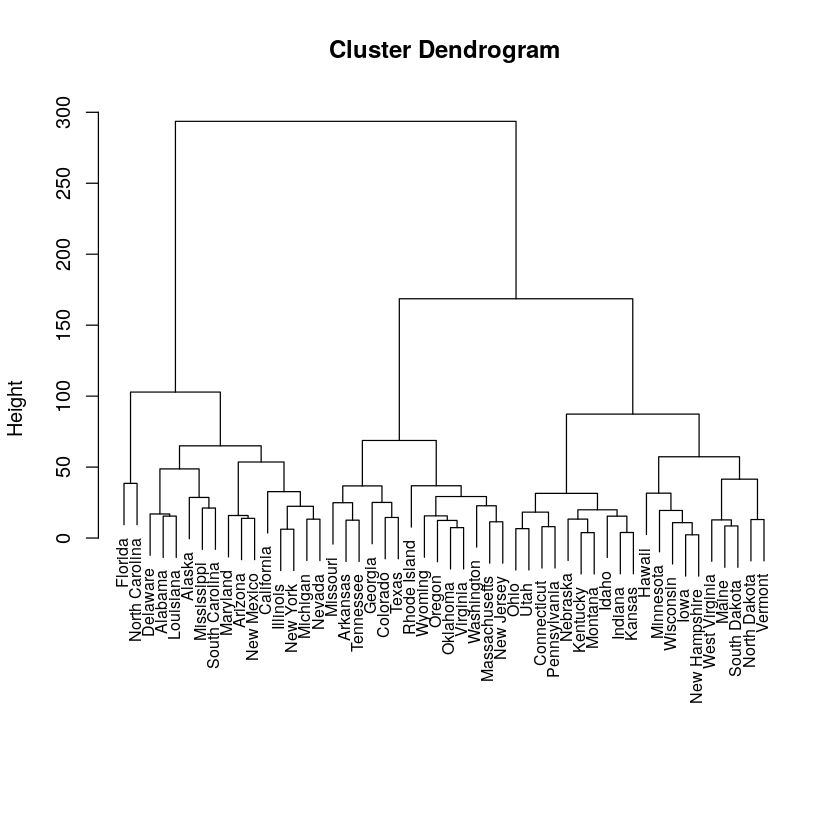

In [4]:
hc.complete = hclust(dist(USArrests), method='complete')
plot(hc.complete, cex=.8, xlab="", sub="")

In [5]:
clusters = cutree(hc.complete, 3)
sort(clusters)

Alabama         Alaska        Arizona     California       Delaware 
             1              1              1              1              1 
       Florida       Illinois      Louisiana       Maryland       Michigan 
             1              1              1              1              1 
   Mississippi         Nevada     New Mexico       New York North Carolina 
             1              1              1              1              1 
South Carolina       Arkansas       Colorado        Georgia  Massachusetts 
             1              2              2              2              2 
      Missouri     New Jersey       Oklahoma         Oregon   Rhode Island 
             2              2              2              2              2 
     Tennessee          Texas       Virginia     Washington        Wyoming 
             2              2              2              2              2 
   Connecticut         Hawaii          Idaho        Indiana           Iowa 
             3              3              3              3              3 
        Kansas       Kentucky          Maine      Minnesota        Montana 
             3              3              3              3              3 
      Nebraska  New Hampshire   North Dakota           Ohio   Pennsylvania 
             3              3              3              3              3 
  South Dakota           Utah        Vermont  West Virginia      Wisconsin 
             3              3              3              3              3

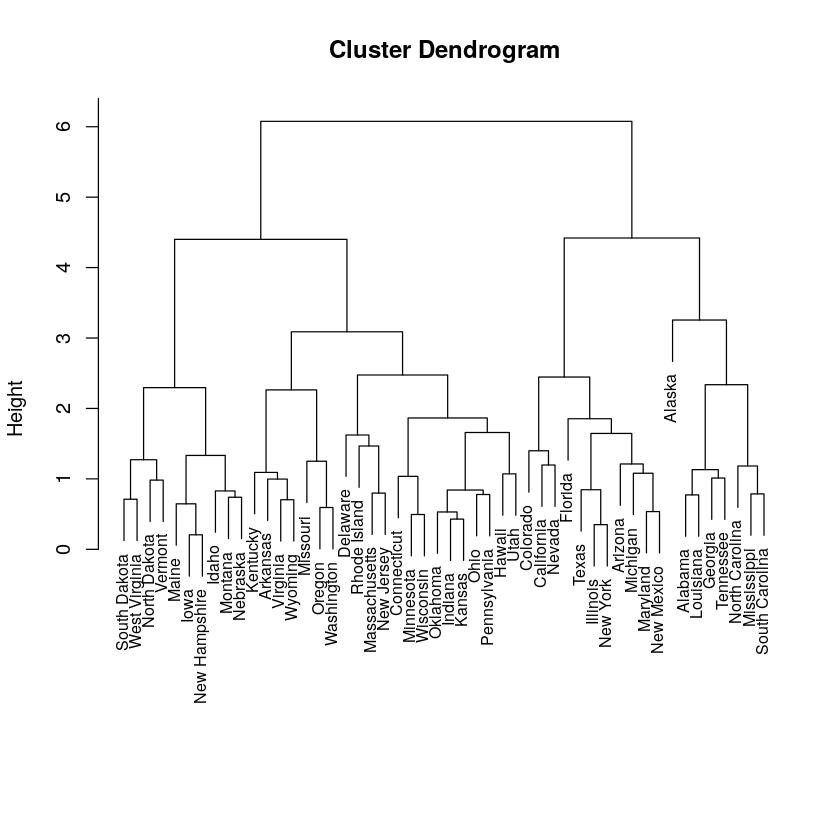

In [6]:
hc.complete.scaled = hclust(dist(scale(USArrests)), method='complete')
plot(hc.complete.scaled, cex=.8, xlab="", sub="")

In [7]:
clusters.scaled = cutree(hc.complete.scaled, 3)
sort(clusters.scaled)

Alabama         Alaska        Georgia      Louisiana    Mississippi 
             1              1              1              1              1 
North Carolina South Carolina      Tennessee        Arizona     California 
             1              1              1              2              2 
      Colorado        Florida       Illinois       Maryland       Michigan 
             2              2              2              2              2 
        Nevada     New Mexico       New York          Texas       Arkansas 
             2              2              2              2              3 
   Connecticut       Delaware         Hawaii          Idaho        Indiana 
             3              3              3              3              3 
          Iowa         Kansas       Kentucky          Maine  Massachusetts 
             3              3              3              3              3 
     Minnesota       Missouri        Montana       Nebraska  New Hampshire 
             3              3              3              3              3 
    New Jersey   North Dakota           Ohio       Oklahoma         Oregon 
             3              3              3              3              3 
  Pennsylvania   Rhode Island   South Dakota           Utah        Vermont 
             3              3              3              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

*Big difference in outcomes. Scaling variables will make the clustering unit independent and would be my preferred method unless all measures are in the same unit.*

### 10. In this problem, you will generate simulated data, and then perform PCA and $K$-means clustering on the data.

#### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in `R` that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

#### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

#### (c) Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?

Hint: You can use the `table()` function in `R` to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: $K$-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

#### (d) Perform $K$-means clustering with $K = 2$. Describe your results.

#### (e) Now perform $K$-means clustering with $K = 4$, and describe your results.

#### (f) Now perform $K$-means clustering with $K = 3$ on the first two principal component score vectors, rather than on the raw data. That is, perform $K$-means clustering on the $60 \times 2$ matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

#### (g) Using the `scale()` function, perform $K$-means clustering with $K = 3$ on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

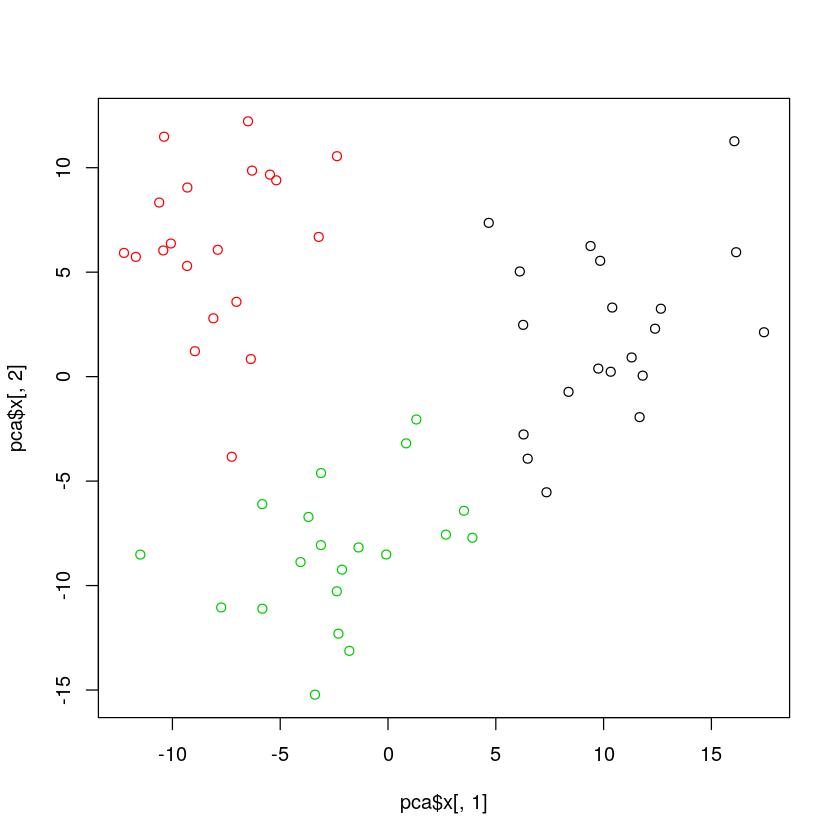

In [8]:
p = 50
cl = 3
no = 20

set.seed(123)
X = matrix(rnorm(cl*no*p, 1, 3), ncol=p)
y = numeric(cl*no)
for (i in 1:cl){
    b = rnorm(p,0,1.5)
    start = no*(i-1)+1
    finish = no*i
    X[start:finish,] = X[start:finish,] + t(matrix(rep(b,no),nrow=p))
    y[start:finish] = i
}
pca = prcomp(X)
plot(pca$x[,1], pca$x[,2], col=y)

In [9]:
km3 = kmeans(X, 3, nstart=100)
table(y, km3$cluster)
cat('Only 2 observations "missclassified"')

   
y    1  2  3
  1 20  0  0
  2  0  1 19
  3  1 19  0

Only 2 observations "missclassified"

In [10]:
km4 = kmeans(X, 4, nstart=100)
table(y, km4$cluster)
cat('Real cluster 1 got split in 2, 3 observations "missclassified"')

   
y    1  2  3  4
  1  0  6  0 14
  2 19  0  1  0
  3  0  2 18  0

Real cluster 1 got split in 2, 3 observations "missclassified"

In [11]:
km3pca = kmeans(pca$x[,1:2], 3, nstart=100)
table(y, km3pca$cluster)
cat('Very similar results, only one observation "missclassified"')

   
y    1  2  3
  1  0 20  0
  2 19  0  1
  3  0  0 20

Very similar results, only one observation "missclassified"

In [12]:
km3scale = kmeans(scale(X), 3, nstart=100)
table(y, km3scale$cluster)
cat('Only 1 observations "missclassified", 
very much like the red dot on the plot closer to the green cluster.')

   
y    1  2  3
  1  0  0 20
  2  0 20  0
  3 19  0  1

Only 1 observations "missclassified", 
very much like the red dot on the plot closer to the green cluster.

### 11. On the book website, www.StatLearning.com, there is a gene expression data set (`Ch10Ex11.csv`) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

#### (a) Load in the data using `read.csv()`. You will need to select `header=F`.

#### (b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

#### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

In [13]:
X = read.csv('Ch10Ex11.csv', header=F)
summary(X)

       V1                  V2                  V3                  V4          
 Min.   :-3.056328   Min.   :-3.240490   Min.   :-3.527188   Min.   :-3.06553  
 1st Qu.:-0.684539   1st Qu.:-0.703363   1st Qu.:-0.724498   1st Qu.:-0.70183  
 Median : 0.032338   Median :-0.006061   Median : 0.000255   Median : 0.01735  
 Mean   : 0.006397   Mean   :-0.020648   Mean   :-0.012895   Mean   :-0.00940  
 3rd Qu.: 0.676673   3rd Qu.: 0.660186   3rd Qu.: 0.627725   3rd Qu.: 0.66906  
 Max.   : 3.519299   Max.   : 3.084000   Max.   : 3.458551   Max.   : 3.22213  
       V5                 V6                 V7                 V8          
 Min.   :-2.99742   Min.   :-2.85389   Min.   :-2.74516   Min.   :-3.62753  
 1st Qu.:-0.73211   1st Qu.:-0.68827   1st Qu.:-0.64695   1st Qu.:-0.66294  
 Median :-0.04396   Median :-0.01104   Median : 0.03087   Median :-0.05012  
 Mean   :-0.04554   Mean   :-0.04223   Mean   : 0.03408   Mean   :-0.01432  
 3rd Qu.: 0.66127   3rd Qu.: 0.60505   3rd Qu.: 0.69415

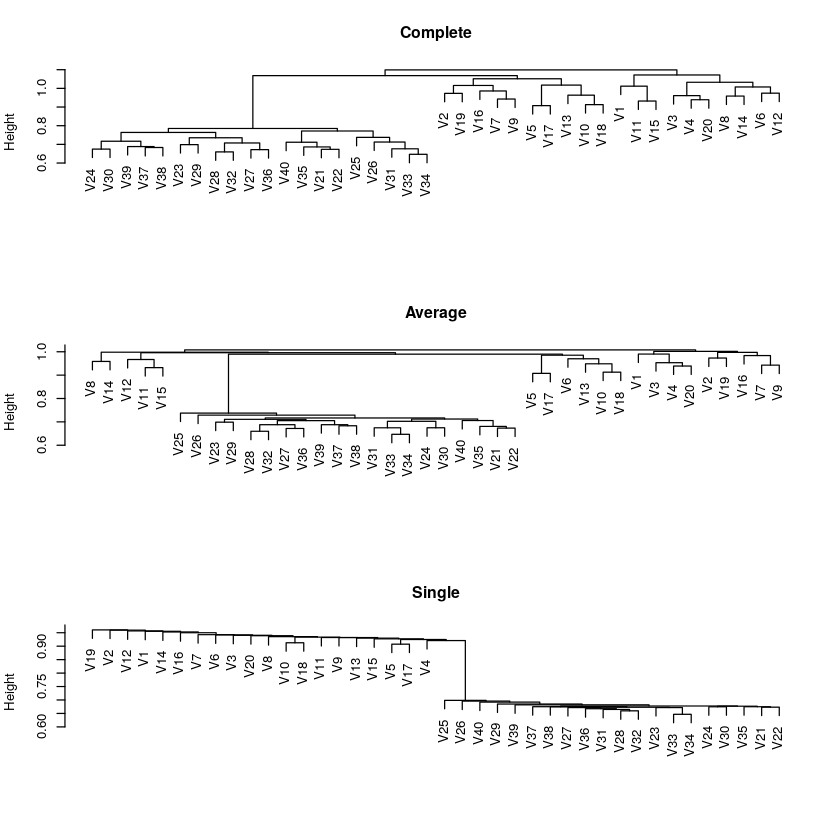

In [14]:
dd = as.dist(1-cor(X))
hc.complete=hclust(dd, method="complete")
hc.average=hclust(dd, method="average")
hc.single=hclust(dd, method="single")
par(mfrow=c(3,1))
plot(hc.complete, main='Complete', xlab='', sub='')
plot(hc.average, main='Average', xlab='', sub='')
plot(hc.single, main='Single', xlab='', sub='')

In [15]:
table(cutree(hc.complete,4))


 1  2  3  4 
 3 10  7 20 

In [16]:
table(cutree(hc.average,8))


 1  2  3  4  5  6  7  8 
 1  2  3  6  3  2  3 20 

Bands where black and red are not overlapping are the genes that differ the most.

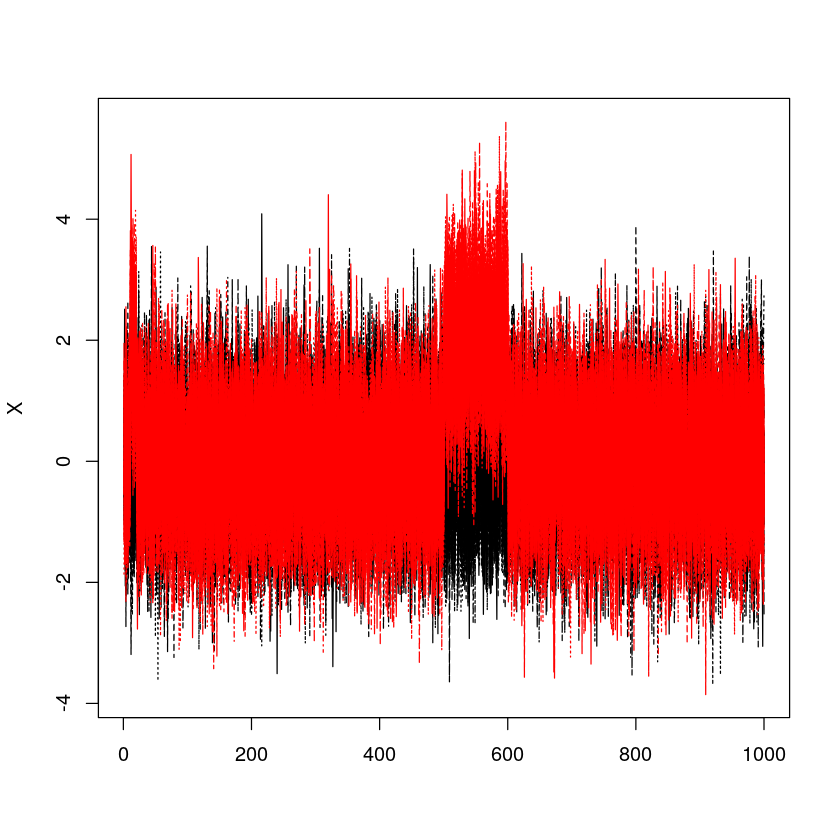

In [17]:
matplot(X, type='l', col = c(cutree(hc.complete,4)==4)+1)
cat('Bands where black and red are not overlapping are the genes that differ the most.')